<a href="https://colab.research.google.com/github/mashyko/Image-Classifier/blob/master/MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kerasを用いた画像分類：Mobile Net

In [1]:
!git clone https://github.com/mashyko/Image-Classifier

Cloning into 'Image-Classifier'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 112 (delta 43), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (112/112), 3.15 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [3]:
%cd Image-Classifier

/content/Image-Classifier


In [4]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
import numpy as np

model = MobileNet(weights='imagenet')
#model = load_model('mobilenet.h5', custom_objects={
#                   'relu6': mobilenet.relu6,
 #                 'DepthwiseConv2D': mobilenet.DepthwiseConv2D})
#model=MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

img_path ="images/elephant.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#model.summary()

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])




40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.8865), ('n01871265', 'tusker', 0.06346993), ('n02504013', 'Indian_elephant', 0.049903136)]


画像の表示

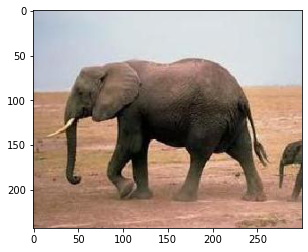

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

img= Image.open('images/elephant.jpg')
plt.figure()
plt.imshow(img)
plt.show()